# Python for deep learning

In [19]:
import os
if  not os.path.isdir('./training'):
  !cd /content/ && git clone https://github.com/MontpellierRessourcesImagerie/DL_EXP_PC.git && cp -r DL_EXP_PC/data . && cp -r DL_EXP_PC/training .
  %cd DL_EXP_PC

## Cell 10

```python
%matplotlib inline
import matplotlib.pyplot as plt, mpld3
def createSubplot(x, dataSeries, dataLabels, title, xLabel, yLabel, legendLoc, position):
    plt.subplot(position)
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    for y, label in zip(dataSeries, dataLabels):
        plt.plot(x, y, label=label)
    plt.legend(loc=legendLoc)
xValues = np.arange(1., len(history.history['loss'])+1, 1)
plt.rcParams['xtick.major.pad']='16'
plt.rcParams['ytick.major.pad']='16'
plt.rcParams["figure.figsize"] = (15,5)
createSubplot(xValues, [history.history['accuracy'], history.history['val_accuracy']], 
              ["Training", "Validation"], "Model accuracy", "Epoch", "Accuracy",  "lower right", 121)
createSubplot(xValues, [history.history['loss'], history.history['val_loss']], 
              ["Training", "Validation"], "Model loss", "Epoch", "Loss", "upper right", 122)
plt.tight_layout(pad=3.0)
mpld3.display()
```

In cell 10 we create interactive plots of the history of the accuracy and loss.

## A simple plot with pyplot

We import the module pyplot with the name plt from matplotlib. In the simplest form we can just pass in an array of numerical values, that will be plotted.

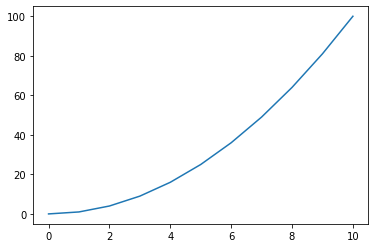

In [19]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 11, 1)
plot = plt.plot(x**2)

We can also pass in the x-values of the plot. If we do not provide x-values, the x-values will be the indices of the y-values starting with zero, which might not be correct

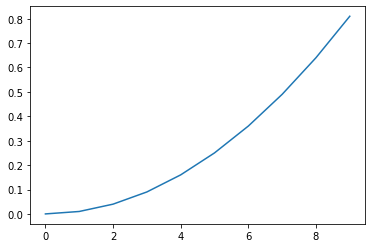

In [18]:
x = np.arange(0, 1, 0.1)
plot = plt.plot(x**2)

In th above plot, the x values for which we calculate the square range from 0 to one. Since we do not specify the x-values when creating the plot, the values diplayed on the x-axis are the indices of the array, which is wrong.

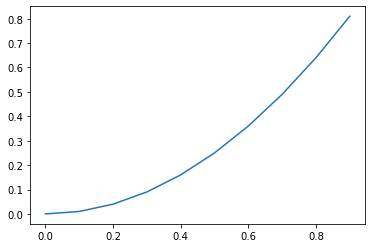

In [17]:
x = np.arange(0, 1, 0.1)
plot = plt.plot(x, x**2)

Now that we additinally passed in the x-values, we get the right values on the x-axis.

A problem might be the fixed scale of the plot. It is for example hard to see what the values between 0 and 0.05 are in the above plot. We therefore use the library mpld3 to create interactive plots, that allow us to zoom and pan in the plot.

In [20]:
%matplotlib inline
import mpld3
x = np.arange(0, 1, 0.1)
plt.plot(x, x**2)
mpld3.display()

If you move the mouse below the lower left corner of the plot, three icons appear. The home icon resets the plot. The second icon activates panning. When activated you can left-click and drag in the plot to change the visible part of the graph. The third icon activates the zoom. When activated you can left-click into the view and drag to create a rectangular region to which the view will be zoomed.

We can add a label for each function that we plot. If we add a label we also need to tell pyplot to display a legend. We can specify where the legend will be displayed.

In [26]:
%matplotlib inline
import mpld3
plt.plot(x, x**2, label = "x**2")
plt.legend(loc='upper center')
mpld3.display()

We can display multiple graphs in the same plot.

In [32]:
%matplotlib inline
import mpld3
plt.plot(x, x**2, label = "x**2")
plt.plot(x, x**4, label = "x**4")
plt.legend(loc='upper center')
mpld3.display()

We can display a title for the plot

In [46]:
from scipy.stats import norm
norm = norm()
x = np.arange(-10, 10, .1)
plt.title('Normal distribution')
plt.plot(x, norm.pdf(x))
mpld3.display()

We can also label the axes.

In [49]:
import math
x = np.arange(0, 10, .1)
plt.title('Area of a circle with a given radius')
plt.xlabel('radius')
plt.ylabel('area')
plt.plot(x, x**2 * math.pi)
mpld3.display()

We can create a plot consisting of multiple subplots. The parameters of the subplot method are:

* number of rows
* number of columns
* index of the subplot in the grid, from left to right and top to bottom

In [51]:
plt.subplot(1, 2, 1)
x = np.arange(0, 10, .1)
plt.title('Area of a circle with a given radius')
plt.xlabel('radius')
plt.ylabel('area')
plt.plot(x, x**2 * math.pi)
plt.subplot(1, 2, 2)
plt.title('Circumference of a circle with a given radius')
plt.xlabel('radius')
plt.ylabel('circumference')
plt.plot(x, x * 2 * math.pi)
mpld3.display()

We modify the size of the plot and also set a padding beween the tics of the axis and the labels.

In [53]:
plt.subplot(1, 2, 1)
x = np.arange(0, 10, .1)
plt.rcParams['xtick.major.pad']='16'
plt.rcParams['ytick.major.pad']='16'
plt.rcParams["figure.figsize"] = (15,5)
plt.title('Area of a circle with a given radius')
plt.xlabel('radius')
plt.ylabel('area')
plt.plot(x, x**2 * math.pi)
plt.subplot(1, 2, 2)
plt.title('Circumference of a circle with a given radius')
plt.xlabel('radius')
plt.ylabel('circumference')
plt.plot(x, x * 2 * math.pi)
mpld3.display()

We can use a function to create the subplots, so that we do not have to write the same code twice.

Note, instead of three integers the function subplot also accepts a three digit integer where the digits are interpteted as the row, column and index.

In [56]:
def createSubplot(x, y, title, xLabel, yLabel, position):
    plt.subplot(position)
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.plot(x, y)

plt.rcParams['xtick.major.pad']='16'
plt.rcParams['ytick.major.pad']='16'
plt.rcParams["figure.figsize"] = (15,5)
createSubplot(x, x**2 * math.pi, 'Area of a circle with a given radius', "radius", "area", 121)
createSubplot(x, x * 2 * math.pi, 'Circumference of a circle with a given radius', "radius", "area", 122)
mpld3.display()